In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
# Load dữ liệu
df = pd.read_csv('combined_data.csv', encoding='utf-8')  # Đảm bảo UTF-8 cho tiếng Việt

# Kiểm tra cơ bản
df.head()


,Original Text,Label,Emotional Reasoning,Overgeneralization,Should Statements,Personalization,Mental Filter,Disqualifying the Positive,Jumping to Conclusions,Labeling and Mislabeling,Magnification and Minimization,All-or-Nothing Thinking
0,"Cô ấy luôn có những hành động kỳ lạ, ví dụ như...",0,0,0,0,0,0,0,0,0,0,0
1,"Nếu bố mẹ tôi biết tôi đang vật lộn thế nào, h...",1,0,0,0,0,0,0,1,0,0,0
2,"Trong năm thứ 4 và thứ 5 của sự nghiệp, tôi kh...",1,0,0,0,0,0,0,0,0,0,1
3,"Tôi muốn bị ốm, và tôi biết điều đó thật khủng...",0,0,0,0,0,0,0,0,0,0,0
4,Trước khi chúng tôi bắt đầu hẹn hò và trong nă...,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20092 entries, 0 to 20091
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Original Text                   20092 non-null  object
 1   Label                           20092 non-null  int64 
 2   Emotional Reasoning             20092 non-null  int64 
 3   Overgeneralization              20092 non-null  int64 
 4   Should Statements               20092 non-null  int64 
 5   Personalization                 20092 non-null  int64 
 6   Mental Filter                   20092 non-null  int64 
 7   Disqualifying the Positive      20092 non-null  int64 
 8   Jumping to Conclusions          20092 non-null  int64 
 9   Labeling and Mislabeling        20092 non-null  int64 
 10  Magnification and Minimization  20092 non-null  int64 
 11  All-or-Nothing Thinking         20092 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.8+ MB


In [9]:
df['Label'].value_counts()

Label
1    15030
0     5062
Name: count, dtype: int64

In [10]:
df['Label'].value_counts(normalize=True)

Label
1    0.748059
0    0.251941
Name: proportion, dtype: float64

In [11]:
multi_label_columns = ['Emotional Reasoning', 'Overgeneralization', 'Should Statements', 
                       'Personalization', 'Mental Filter', 'Disqualifying the Positive', 
                       'Jumping to Conclusions', 'Labeling and Mislabeling', 
                       'Magnification and Minimization', 'All-or-Nothing Thinking']
print("\nPhân bố nhãn multi-label:")
for col in multi_label_columns:
    print(f"{col}: {df[col].sum()} samples ({df[col].mean():.2%})")


Phân bố nhãn multi-label:
Emotional Reasoning: 1223 samples (6.09%)
Overgeneralization: 1422 samples (7.08%)
Should Statements: 1053 samples (5.24%)
Personalization: 1215 samples (6.05%)
Mental Filter: 1144 samples (5.69%)
Disqualifying the Positive: 1244 samples (6.19%)
Jumping to Conclusions: 3095 samples (15.40%)
Labeling and Mislabeling: 3021 samples (15.04%)
Magnification and Minimization: 1123 samples (5.59%)
All-or-Nothing Thinking: 1241 samples (6.18%)


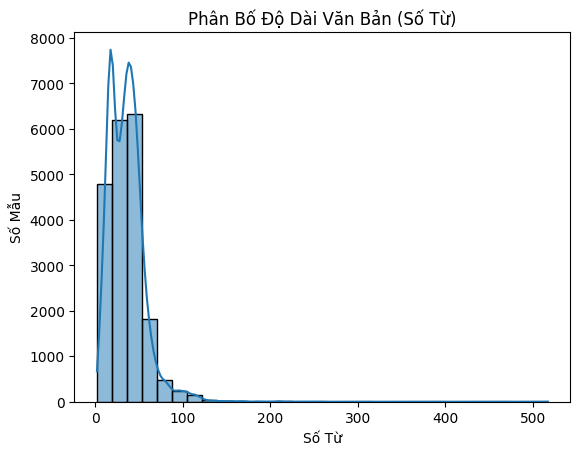

In [12]:
df['text_length'] = df['Original Text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Phân Bố Độ Dài Văn Bản (Số Từ)')
plt.xlabel('Số Từ')
plt.ylabel('Số Mẫu')
plt.show()


In [13]:
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Label'], random_state=42)
print(f"Kích thước: Train {len(train_df)}, Val {len(val_df)}, Test {len(test_df)}")

Kích thước: Train 16073, Val 2009, Test 2010


In [14]:
train_df.to_csv('./process/train.csv', index=False, encoding='utf-8')
val_df.to_csv('./process/val.csv', index=False, encoding='utf-8')
test_df.to_csv('./process/test.csv', index=False, encoding='utf-8')